#1 Introduction to Brain-inspired NeuralNetwork Modelling


## Introduction

### Brigding the Gap: Intersection of Neuroscience, Mathematics and Computing

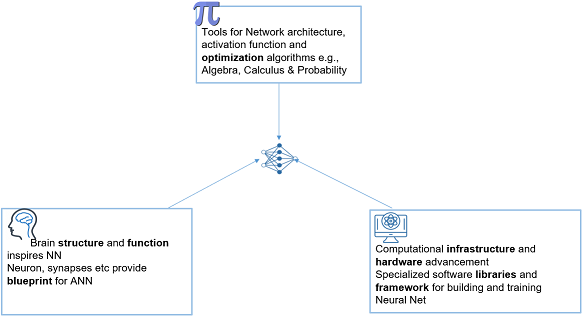


### **Artificial Vs Biological Neurons: Similarities and Differences**

*   ANN abstract **complex** biological process, simplifying them into weighted inputs, activation function, and output
* ANN performs at **faster** speed biological neurons – can perform as much as 10^6 calculation per sec
*  ANN operate with high **precision**, neurons are generally affected by noise and are probabilistic in nature
*  ANN rely on mathematical optimization concept (e.g sigmoid function, gradient decent) to **learn**, neurons adapt themselves using natural concept like synaptic plasticity

Some of the features of biological neurons are abracted away in the artificial counterpart. Any trade-offs? What do you think?

## How does Biological Neuron works?
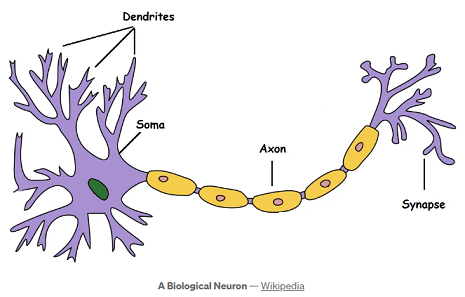

*  Dendrites: accept signals from other neurons
*  Soma process the information
*  Axon transmit the output
*  Synapse acts as the point of connection to other neurons
*  Action potentials are electrical impulses that sends signals round the cell body

Neuron are involved in every decisions to be made by the brain, with more than 100 billion neurons that are massively interconnected!  
There are some sort of division of labour within them

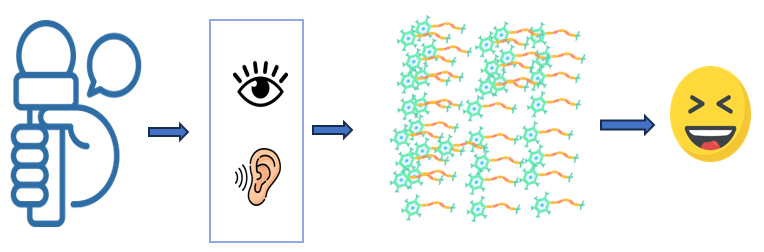

## M-P Neuron
Warren MuCulloch and Walter Pitts conceived and proposed the very first computational model of neuron in 1943
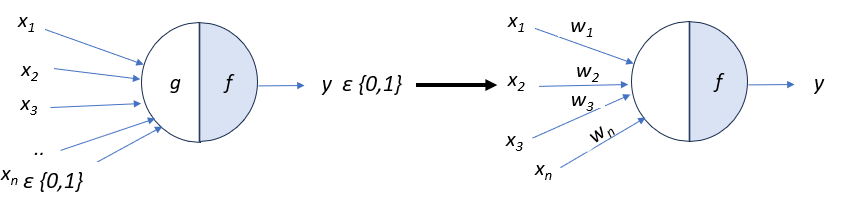

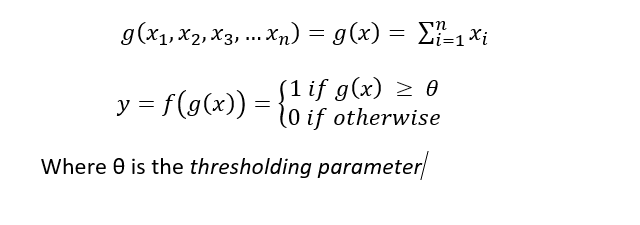

Example:

Consider a simple model that predict either you would eat a certain food {1: I'd eat, 0:I wouldn't eat} based on some set of inputs (x_1, x_2,x_3,...x_n). What values of x could influence your decision?


*   x1: isBreakFastOrLunchTime(I have decided to eat just twice a day Fitfam!)
*   x2: isMyFavourite('I love chicken sandwitch')
*   x3: isWaterFastingDay('I only take water on Mondays and Wednesdays!')
*   ..



What other form of decisions making process can you think of?

##Boolean Function with MP Neuron
Essentially, so far, we can see that all MP Neuron is doing is learning a boolean operation - where both input and output are set of boolean values.

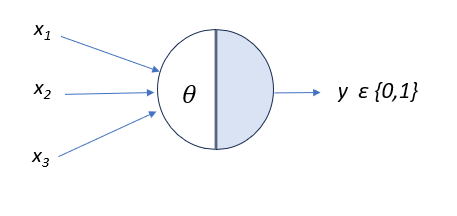


##OR Operation
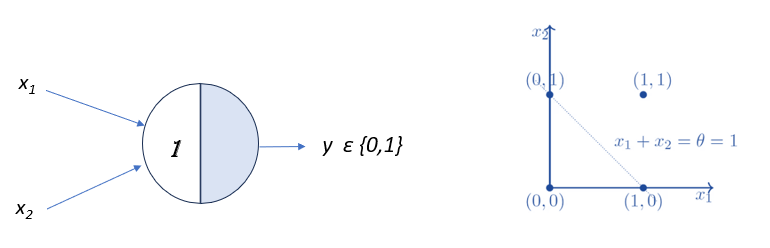

##AND Operation
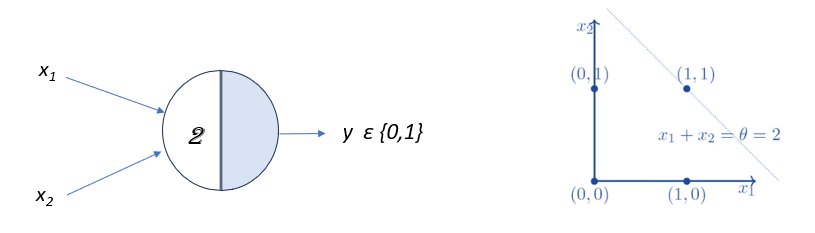

# 2. Multi-layer perceptron model

We're progressing from a single perceptron model to a network with multiple interconnected perceptrons. In this initial section, you'll implement the feedforward pass for a basic task. In subsequent practical sessions, you'll explore methods to enhance its predictive accuracy.



## 2.1 Intro

In this first part we will solve a task using forward pass of an artificial neural network. Our goal is to learn a mapping from given input values
$\mathbf{u}$ to their corresponding output $v$. We generally call $\mathbf{u}$ the *features* of a given example, whereas $v$ is the respective $target$. A key assumption is that there exists a dataset $\mathcal{D}$, provided by some external 'teacher', full of feature-target pairs $(\mathbf{u}_i, v_i)_{i=1}^N$ for some dataset size $N$.

Given a sufficiently large dataset size
$N$, neural networks can be trained very successfully to predict target values for previously unseen feature vectors.

Here we are going to train a neural network of one hidden layer to compute different logic gates; in particular, the <span style="font-variant:small-caps;">AND, OR, XOR, XNOR</span> gates. Each of these gates take as input two logical values (0 or 1), A and B, and combines them to form some logical output. The table of outputs for each possible A, B combination for each gate is shown below.

| A | B | AND | OR | XOR | XNOR |
| - | - | - | - | - | - |
| 0 | 0 |0| 0 | 0 | 1 |
| 0 | 1 |0| 1 | 1 | 0 |
| 1 | 0 | 0 | 1 | 1 | 0 |
| 1 | 1 | 1 | 1 | 0 | 1 |



Training such a neural network to solve these logical computations is only part of the task. Remember, we want to understand information processing *in the brain*. It is important to ask yourself questions such as 'how does this compare with the real brain?', 'are there any differences/limitations in learning and performance of the artificial model with respect to biology'?

##2.2 Importing libraries

First, let's import the required libraries. Instead of relying on specialized machine learning libraries like pytorch, we'll delve into the underlying mathematical computations by handling array operations ourselves with numpy. For visualization, we'll utilize matplotlib.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 2.3 Preparing the Data Sets
It's time to organize our data. Given that we have just four unique input combinations (as detailed in the previous table), our task is fairly straightforward. We'll capture the dataset in the form of a list containing possible $(\mathbf{u}, v)$ pairs, using the terminology mentioned earlier. The data for the AND operation has already been provided. Your initial challenge is to define the datasets for the OR, XOR, and XNOR operations.

In [6]:
#the dataset defined by the logical operator AND
dataset_and = [
                ([0, 0], 0),
                ([0, 1], 0),
                ([1, 0], 0),
                ([1, 1], 1)
                ]

#the dataset defined by the logical operator OR
dataset_or = "TODO"

#the dataset defined by the logical operator XOR
dataset_xor = "TODO"

#the dataset defined by the logical operator XNOR
dataset_xnor = "TODO"

In machine learning, data is often fed to the model in groups or "batches" rather than one example at a time. Here's why:

1. **Efficiency**: For extensive datasets, batch processing can significantly expedite the learning process. This is because, instead of looping through data points one by one, we leverage highly optimized operations that can process entire arrays of data simultaneously.

2. **Batch Processing**: Despite the simplicity and small size of our current dataset, it's crucial to familiarize ourselves with batch processing. Real-world applications often require handling vast amounts of data, and having proficiency with batch processing becomes indispensable.

3. **Code Flexibility**: Even if our dataset doesn't necessitate batch learning, writing code that's adaptable to variable batch sizes is a valuable practice. This ensures our code remains scalable and applicable to diverse scenarios.

Given these considerations, we'll introduce a 'generate_batch' function. This method will:

- Accept a user-defined dataset and batch size as inputs.
- Produce a batch of the specified size with appropriate examples from the dataset.

In [7]:
# Batch Creation: Using a dataset D and a specified batch_size N, this function
# selects N random samples from D. It returns a tuple containing ordered arrays:
# (inputs, targets). For each entry, targets[i] matches the target for inputs[i].

def generate_batch(dataset, batch_size):
    #differentiate inputs (features) from targets and transform each into
    #numpy array with each row as an example
    inputs = np.vstack([ex[0] for ex in dataset])
    targets = np.vstack([ex[1] for ex in dataset])

    #randomly choose batch_size many examples; note there will be
    #duplicate entries when batch_size > len(dataset)
    rand_inds = np.random.randint(0, len(dataset), batch_size)
    inputs_batch = inputs[rand_inds]
    targets_batch = targets[rand_inds]

    return inputs_batch, targets_batch


We can now easily generate batches for any of the datasets defined above. As an example, to obtain 100 examples out of the XOR dataset, we just run

In [ ]:
inputs_xor, targets_xor = generate_batch(dataset_xor, batch_size=100)

## 2.4 Network Initialization

Let's construct our single hidden layer neural network. While neural networks have multiple nuances, it's pivotal to maintain clear and interpretable code. For our architecture, we'll take inspiration from how neural networks are structured in [Pytorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html).

Specifically, we'll define a class, *nn_one_layer*, which will be initialized based on several critical hyperparameters:


*   input_size: Determines the dimensionality of the network input.
*   hidden_size: Represents the hidden layer's dimensionality, essentially defining the number of hidden units or "neurons."
*   target_size: Specifies the network's desired output dimension.

The hyperparameters also guide the dimensions of the network's weight matrices. We'll focus on two weight matrices, $W_1$ and $W_2$. When provided with a feature vector, $\mathbf{u}$, the network predicts the output, $\hat{v}$, via:

\begin{align}
\mathbf{h} &= f(\mathbf{u}W_1) \\
\hat{v} &= \mathbf{h}W_2
\end{align}

Where $\mathbf{h}$ is the 'hidden activity' of the network and $f$ is usually some non-linearity. In this task we will take $f$ to be the sigmoid function, i.e., $f(a) =\frac{1}{1+e^{-a}}$. Because the target dimension is often one in machine learning problems (and as for this task), we can just use a scalar for the network output $y$.



### 2.4.1 Matrix Representation of Equations

To efficiently handle batch processing and streamline our computations, we'll represent the previously discussed equations in matrix form. Adopting this matrix notation not only enhances the clarity and structure of our calculations but also allows us to exploit optimized matrix operations for improved performance.

Note that due to the nature of matrix multiplication the above equations can easily handle a batch $\mathbf{U}$. For example, let $b_s$ denote the batch size, and $i_s$, $h_s$ and $o_s$ the input, hidden and output size respectively. Now we can write the dimension of the input matrix $\mathbf{U}$ as $(b_s, i_s)$. The equations for the 'batch hidden activity' $\mathbf{H}$ and 'batch output' $\mathbf{v}$ is just the same as before

\begin{align}
\mathbf{H} &= f(\mathbf{Z}) \\
\mathbf{Z} &= \mathbf{U}W_1 \\
\hat{\mathbf{v}} &= \mathbf{H}W_2
\end{align}

Understanding Check: Can you determine the dimensions of matrices $\mathbf{H}$ and $\hat{\mathbf{v}}$ based on $i_s$, $h_s$, $o_s$, and $b_s$? How about the dimensions of $W_1$ and $W_2$?

In [ ]:
#code for *nn_one_layer* which initiliases the model and also defines the forward
#computation. we will initialise each weight randomly according to a normal
#distribution of standard deviation sigma = 0.1.

def sigmoid(a):
    sigma = "TODO"
    return sigma


class nn_one_layer():
    def __init__(self, input_size, hidden_size, output_size):
        #define the input/output weights W1, W2
        self.W1 = 0.1 * np.random.randn(input_size, hidden_size)
        self.W2 = "TODO"

        self.f = sigmoid

    def forward(self, u):
        z = "TODO"
        h = "TODO"
        v = "TODO"
        return v, h, z

You should now be able to initialise your model and check it can perform a batch computation on the datasets defined above.

### 2.4.2 histogram of output values
Fill in the 'TODO's below to view a histogram of output values for the XOR dataset as predicted by an untrained neural network of 5 hidden neurons.

In [ ]:
input_size = "TODO"
hidden_size = "TODO"
output_size = "TODO"

nn = nn_one_layer(input_size, hidden_size, output_size) #initialise model
preds_xor, _, _ = nn.forward(inputs_xor) #prediction made by model on batch xor input

_, inds = np.unique(inputs_xor, return_index=True, axis=0)


# plot target vs predictions along with a histogram of each
fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=2)
plt.scatter(targets_xor[inds], preds_xor[inds], marker='x', c='black')
for i in inds:
    coord = '({}, {})'.format(inputs_xor[i][0], inputs_xor[i][1])
    xoffset = 0.05 if targets_xor[i] == 0 else -0.1
    yoffset = 0.003 if preds_xor[i] > np.mean(preds_xor[inds]) else -0.005
    plt.text(targets_xor[i] + xoffset, preds_xor[i] + yoffset, coord)
plt.xlabel('target values')
plt.ylabel('predicted values')
plt.ylim([np.min(preds_xor) - 0.01, np.max(preds_xor) + 0.01])
ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
plt.hist(targets_xor, color='blue')
ax2.set_title('target values')
plt.ylabel('# in batch')
ax3 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1, sharey=ax2)
plt.hist(preds_xor, color='red')
ax3.set_title('predicted values')

fig.tight_layout()


If you managed to generate the plot, hopefully you see that the network as it is pretty useless! It doesn't get near the required target values according to the true XOR operator, let alone understanding that it should only produce logical output vaues of 0 or 1.

The expectation is that, with a good learning procedure to train the weights $W_1$ and $W_2$, we should be able to produce a network which much better captures XOR, or indeed any other logical gate we fancy.



## 2.5 Exploration & Experimentation time

It's exploration time! Modify the parameters and see how it impacts the predictions. Also try generating AND, OR and XNOR datasets and plotting the histograms of output values.

# 3. Introduction to RNN Dynamics

The objective of this section is to understand the foundational principles of Recurrent Neural Networks (RNNs), delve deep into their dynamics, and execute the forward pass.



## 3.1 Introduction to RNN Dynamics:

RNNs are a type of neural network with loops, allowing information persistence. Unlike traditional feedforward neural networks, RNNs share parameters across different steps in this sequence. This sharing makes them compact and suitable for sequences. The main formula that drives this behavior is:

In our RNN dynamics equation:

$$
\frac{d x_{i}(t)}{d t} = -x_{i}(t) + \sum_{j=1}^{N} J_{i j} \phi(x_{j}(t)) + h_{i}(t).
$$

Here's a breakdown of each term:

- $\frac{d x_{i}(t)}{d t}$: Represents the rate of change of the state of neuron $i$ at time $t$.

- $x_{i}(t)$: This is the state of neuron $i$ at time $t$. The term $-x_{i}(t)$ helps in decaying the current state over time, ensuring that without any new information, the state will return to zero or become stable.

- $J_{i j}$: This represents the weight from neuron $j$ to neuron $i$. It dictates how much of neuron $j$'s state should influence neuron $i$.

- $\phi(x_{j}(t))$: This term represents the activation function applied to the state of neuron $j$ at time $t$. Activation functions introduce non-linearity and allow the network to model more complex patterns. Common functions include sigmoid, tanh, and ReLU.

- $\sum_{j=1}^{N}$: This is a summation over all neurons in the network, indicating that the next state of neuron $i$ is influenced by all neurons, including itself.

- $h_{i}(t)$: Represents any external input to neuron $i$ at time $t$.

The equation as a whole gives a sense of "memory" to the network, where the future state of a neuron is determined by its current state, the states of all other neurons, and any external input.

## 3.2 Understanding Activation Functions

Activation functions play a pivotal role in neural networks, helping introduce non-linearity into the model. This non-linearity allows neural networks to model complex, non-linear relationships.

Let's visualize some common activation functions:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define common activation functions
def sigmoid(x):
    return "TODO"

def tanh(x):
    return "TODO"

def relu(x):
    return "TODO"

# Plotting
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Activation")

plt.subplot(1, 3, 2)
plt.plot(x, tanh(x))
plt.title("Tanh Activation")

plt.subplot(1, 3, 3)
plt.plot(x, relu(x))
plt.title("ReLU Activation")

plt.tight_layout()
plt.show()

## 3.3 Forward Pass Demonstration


We'll now demonstrate how an RNN processes a given input sequence. For this, we'll use a toy sequence and observe how the RNN's state evolves over time based on the provided input.

In [ ]:
N = 3  # number of neurons
sequence = [0, 1, 0, 1]

# Random initializations
J = np.random.randn(N, N)
x = np.random.randn(N)

states = [x]

# Forward pass through the sequence
for input_val in sequence:
    dx = "TODO"  # Using the RNN dynamics equation
    x = x + dx
    states.append(x)

print("States over time for the provided sequence:", states)


## 3.4 Sequence Generation with Initialized RNN

An RNN with random weights and an initial state can generate a sequence without any external input. Here, we'll set our external input
$h_{i}(t)$ to zero and observe the sequence generation based solely on the RNN's initial state and dynamics. Let's observe this behavior:

In [ ]:
def forward_pass(J, h, initial_state, num_steps=5):

    x = initial_state
    h = np.zeros(N)  # External input is zero
    states = [x]

    for _ in range(num_steps):
        dx = "TODO"
        x = x + dx
        states.append(x)

    return states

initial_state = np.random.randn(N)
generated_sequence = forward_pass(J, h, initial_state)
print("Generated sequence:", generated_sequence)


## 3.5 Visualizing Generated Sequences



In [ ]:
# Visualizing the generated sequence
plt.figure(figsize=(10, 6))

# If you're working with multi-dimensional states, you can plot each dimension separately
for i in range(N):
    plt.plot([state[i] for state in generated_sequence], label=f"Neuron {i+1}")

plt.title("Generated RNN States Over Time")
plt.xlabel("Time Steps")
plt.ylabel("State Value")
plt.legend()
plt.grid(True)
plt.show()


From the plot, observe how the states of the different neurons evolve over time. Even though our RNN isn't trained, certain patterns or behaviors might emerge due to the initialization and the given input. This visualization can be particularly enlightening, showing the potential complexity and richness of RNN dynamics.

## 3.6 Exploration & Experimentation time

It's exploration time! Modify the RNN parameters and see how it impacts the sequence generation. Change the weights, initial states, or even the activation function.

We've touched upon the foundational concepts behind RNN dynamics and their forward pass mechanism. While this is just the tip of the iceberg, it provides a solid groundwork for more advanced topics related to RNNs.